# Test file for clip function

In [4]:
import tempfile
import rasterio as rio
from rasterio.plot import show
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

import sys
sys.path.insert(0, "..")
from eis_toolkit.raster_processing.clipping import clip_raster

<AxesSubplot:>

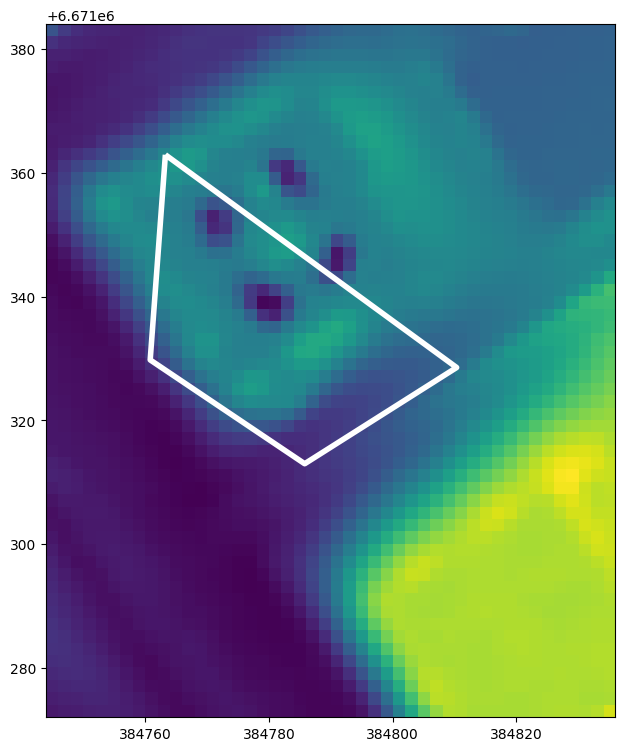

In [6]:
# Read data
input_polygon = gpd.read_file("../tests/data/remote/small_area.shp")
input_raster = rio.open("../tests/data/remote/small_raster.tif")

# See what the raster and polygon look like
fig, ax = plt.subplots(figsize=(9,9))
show(input_raster, ax=ax)
input_polygon.plot(
    ax=ax,
    facecolor="None",
    edgecolor="White",
    linewidth=4,
)

In [9]:
# Do the clip
out_image, out_meta = clip_raster(
    raster=input_raster,
    geodataframe=input_polygon
)

In [10]:
# We dont need this anymore and, since we didnt use a with block earlier, we need to close it manually.
input_raster.close()

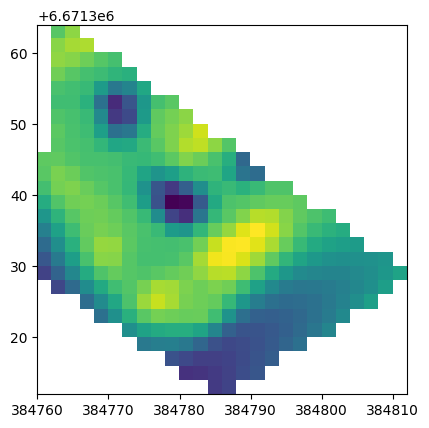

In [11]:
# See the result raster (write to tempfile to not generate an actual file)
with tempfile.NamedTemporaryFile() as tmpfile:
    with rio.open(tmpfile.name, "w", **out_meta) as dest:
        dest.write(out_image)
    with rio.open(tmpfile.name) as raster:
        show(raster)

This is just to show one example on how you can visually check that your tool works as expected. Compare the image above with the result QGIS gives if you clip small_raster.tif with small_area.shp